In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 18
plt.rc('font', family='Helvetica')

In [3]:
decimation_data_commercial = pd.read_csv("data/Decimation_Commercial.csv")
decimation_data_mmi = pd.read_csv("data/Decimation_MMI.csv")

pti_inversion_commercial = pd.read_csv("data/PTI_Inversion_Commercial.csv")
pti_inversion_mmi = pd.read_csv("data/PTI_Inversion_MMI.csv")

# DC Values

## Commercial Coupler

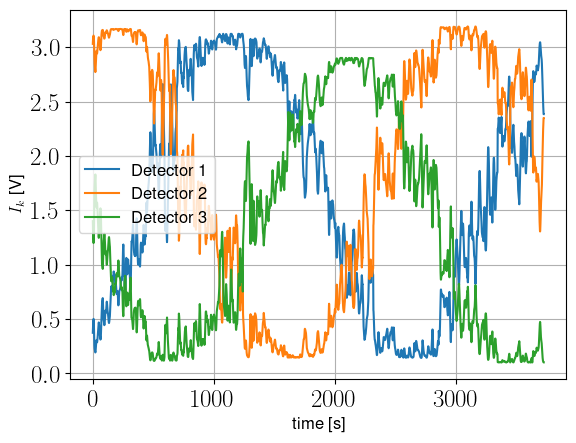

In [4]:
time = np.arange(len(decimation_data_commercial))
for channel in range(1, 4):
    plt.plot(time, decimation_data_commercial[f"DC CH{channel}"], label=f"Detector {channel}")
plt.xlabel("time [s]", fontsize=12)
plt.ylabel("$I_k$ [V]", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

## MMI Coupler

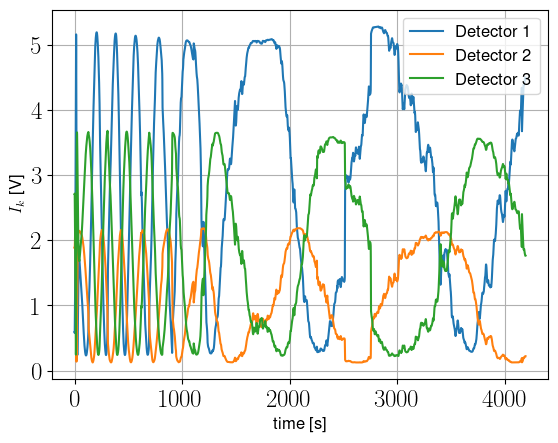

In [5]:
time = np.arange(len(decimation_data_mmi))
for channel in range(1, 4):
    plt.plot(time, decimation_data_mmi[f"DC CH{channel}"], label=f"Detector {channel}")
plt.xlabel("time [s]", fontsize=12)
plt.ylabel("$I_k$ [V]", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

# Lock In Amplitudes

## Commercial Coupler

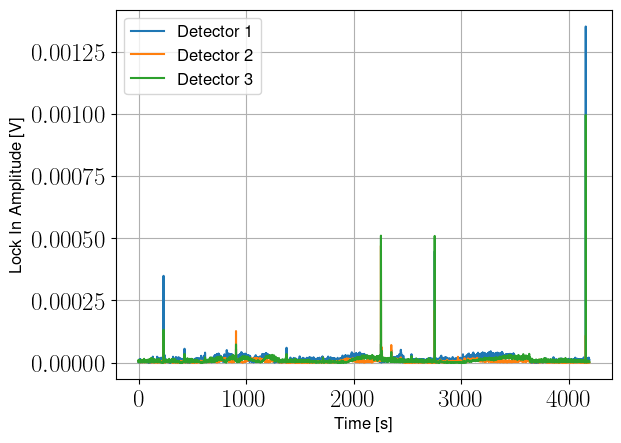

In [6]:
time = np.arange(len(decimation_data_mmi))
for channel in range(1, 4):
    plt.plot(time, decimation_data_mmi[f"AC CH{channel}"], label=f"Detector {channel}")
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel("Lock In Amplitude [V]", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

## MMI Coupler

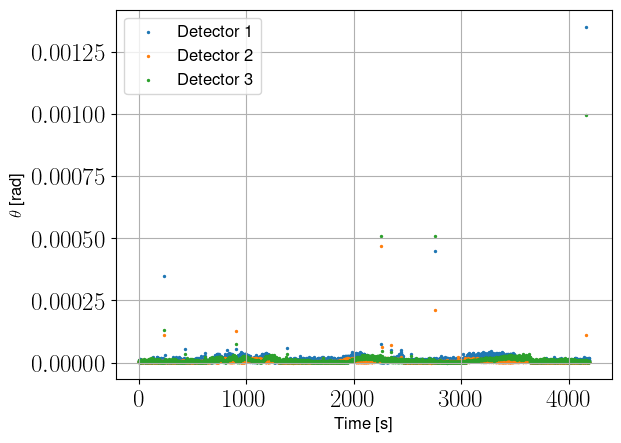

In [7]:
decimation_data_mmi[decimation_data_mmi < 0] += 2 * np.pi
for channel in range(1, 4):
    plt.scatter(range(len(decimation_data_mmi)), decimation_data_mmi[f"AC CH{channel}"], label=f"Detector {channel}", s=2)
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel(r"$\theta$ [rad]", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

# Lock In Phases

## Commercial Coupler

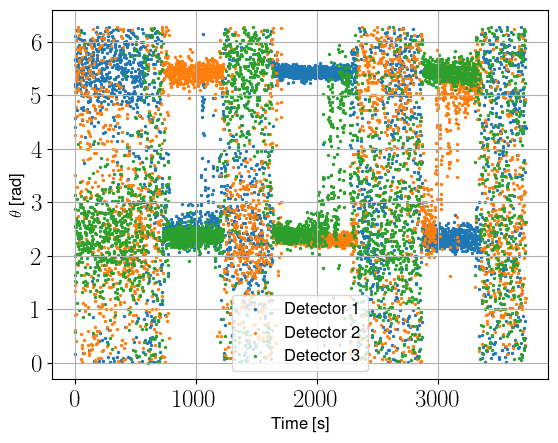

In [8]:
decimation_data_commercial[decimation_data_commercial < 0] += 2 * np.pi
for channel in range(1, 4):
    plt.scatter(range(len(decimation_data_commercial)), decimation_data_commercial[f"AC Phase CH{channel}"], label=f"Detector {channel}", s=2)
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel(r"$\theta$ [rad]", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

In [9]:
response_phase_commercial = []
for channel in range(1, 4):
    response_phase_commercial.append(np.mean(decimation_data_commercial[f"AC Phase CH{channel}"][800:1000]))
response_phase_commercial = np.array(response_phase_commercial)
response_phase_commercial

array([2.4616084 , 5.41029479, 2.35659651])

In [10]:
response_phase_commercial = np.array(response_phase_commercial)
response_phase_commercial[0] += np.pi
response_phase_commercial[2] += np.pi
response_phase_commercial

array([5.60320105, 5.41029479, 5.49818916])

## MMI Coupler

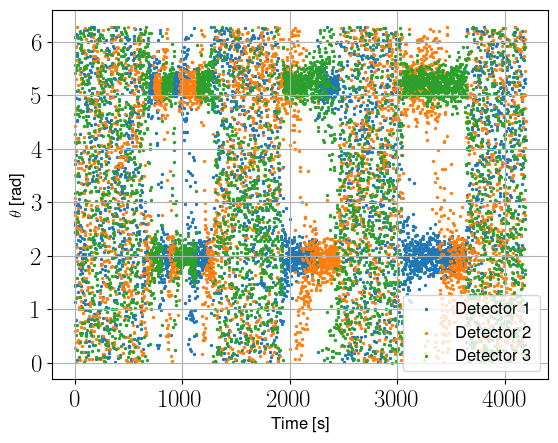

In [11]:
decimation_data_mmi[decimation_data_mmi < 0] += 2 * np.pi
for channel in range(1, 4):
    plt.scatter(range(len(decimation_data_mmi)), decimation_data_mmi[f"AC Phase CH{channel}"], label=f"Detector {channel}", s=2)
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel(r"$\theta$ [rad]", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

In [12]:
response_phase_mmi = []
for channel in range(1, 4):
    response_phase_mmi.append(np.mean(decimation_data_mmi[f"AC Phase CH{channel}"][3050:3350]))
response_phase_mmi = np.array(response_phase_mmi)
response_phase_mmi

array([1.97994273, 5.1734598 , 5.23159043])

In [13]:
response_phase_mmi = np.array(response_phase_mmi)
response_phase_mmi[0] += np.pi
response_phase_mmi

array([5.12153539, 5.1734598 , 5.23159043])

# Interferometric Phase

## Commercial Coupler

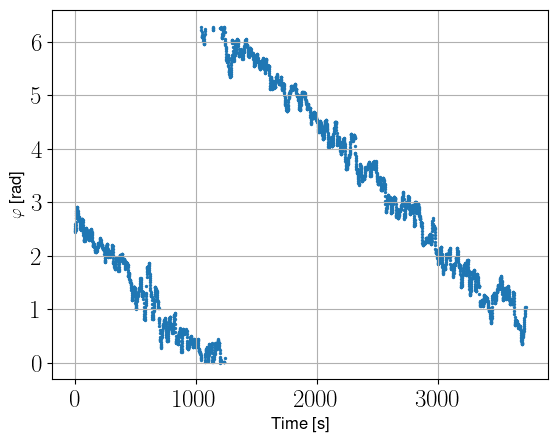

In [14]:
phases_commercial = pti_inversion_commercial["Interferometric Phase"]
plt.scatter(range(len(phases_commercial)), phases_commercial, s=2)
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel(r"$\varphi$ [rad]", fontsize=12)
plt.grid()
plt.show()

## MMI Coupler

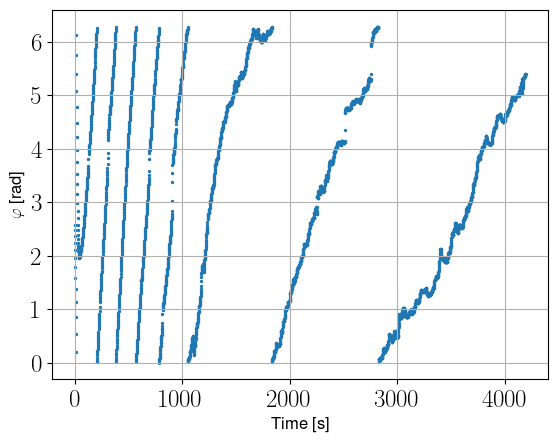

In [15]:
phases_mmi = pti_inversion_mmi["Interferometric Phase"]
plt.scatter(range(len(phases_mmi)), phases_mmi, s=2)
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel(r"$\varphi$ [rad]", fontsize=12)
plt.grid()
plt.show()

# PTI

## Commercial Coupler

In [16]:
pti_commercial = -pti_inversion_commercial["PTI Signal"] * 1e6
pti_mean_commercial_60s = pti_commercial.rolling(60, center=True).mean()

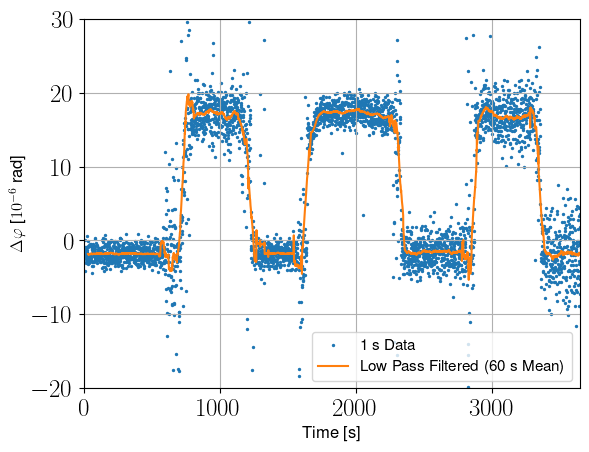

In [17]:
plt.scatter(range(len(pti_commercial)), pti_commercial, s=2, label="1 s Data")
plt.plot(range(len(pti_commercial)), pti_mean_commercial_60s, label="Low Pass Filtered (60 s Mean)", color="tab:orange")
plt.grid()
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel(r"$\Delta\varphi$ [$10^{-6}$ rad]", fontsize=12)
plt.legend(fontsize=11)
plt.axis([0, len(pti_commercial) - 80, -20, 30])
plt.show()

## MMI Coupler

In [18]:
pti_mmi = -pti_inversion_mmi["PTI Signal"] * 1e6
pti_mmi = pd.DataFrame(filter(lambda x: abs(x) < 100, pti_mmi))
pti_mean_mmi_60s = pti_mmi.rolling(60, center=True).mean()

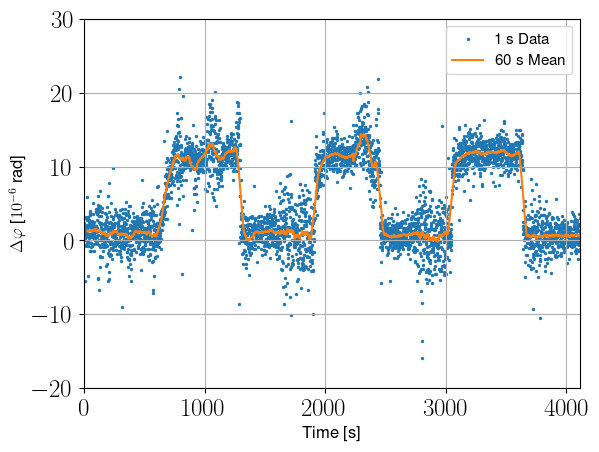

In [19]:
plt.scatter(range(len(pti_mmi)), pti_mmi, s=2, label="1 s Data")
plt.plot(pti_mean_mmi_60s, label="60 s Mean", color="tab:orange")
plt.grid()
plt.axis([0, len(pti_mmi) - 80, -20, 30])
plt.xlabel("Time [s]", fontsize=12)
plt.ylabel(r"$\Delta\varphi$ [$10^{-6}$ rad]", fontsize=12)
plt.legend(fontsize=11)
plt.show()